# Getting Started with AutoDot

A quantum dot is typically defined by applying gate voltages that either accumulate or deplete electrons in a 2D layer below the surface. In the former this could be an MOS device and structured gates could accumulate selective charges at the semiconductor - oxide interface below. In the latter case surface gates could be used to deplete a two-dimensional electron gas in a quantum well or heterostructure below the surface as shown in the picture below.

<img src="images/QD_definition.jpg" alt="QD image" style="width: 400px;"/>

If we now only consider the current through the quantum dot then it is clear that energizing any of the gates to the left together with the central gate will at some point pinch off the current flow through the quantum dot. Als if two of the left gates are used then this situation will occur earlier (crosscoupling). These interrelated pinch-off voltages define a hypersurcae in an n-dimensional space where n is the number of gates that is used to define the quantum dot.

Near the pinch-off voltage of one of the gates Coulomb blockade oscillations could occur if another gate is at a similar voltage level and the gates define a small puddle of charge that can be tunneled into from source and drain. For this to occur the charging energy of this puddle needs to be larger than the thermal energy. 

$E_C = e/C_\Sigma >> k_BT$

This means current transport through the quantum dot is essentially blocked unless the voltage are adjusted to allow an additional electron/hole to be added to the dot. In this case sequential tunneling on and off the dot is possible and a sharp current spike is observed (Coulomb peak). For quantum computing applications it is desirable to confine single charges in each of the quantum dots and shape them to have identical quantum confinement. Since the current through the dot diminishes for small isolated quantum dots a larger nearby quantum dot or quantum point contact can be used as a charge sensor to probe the charge occupation of the qubit dot (rightmost electrodes in image above). Tune-up describes the art of adjusting all gate voltages in a way that we end up with identical quantum dots with one electron/hole on each dot. Due to disorder in the materials this usually does not occur at fully symmetric gate voltages but my suffer from random offsets.

The algorithm first probes the hypersurface (defined by the pinch-off voltages) in random directions. If pinch-off is encountered the algorithm scans for Coulomb blockade peaks and then repeats this for arbitrary rays through the hypervolume.

The mock_device_demo has such a pinch-off hypersurface predefined:
![](Playground/demo_run_data/color_comp_dummy.gif)



In [1]:
from tune import tune_with_playground_from_file

ModuleNotFoundError: No module named 'skimage'

In [3]:
config_file = "mock_device_demo_config.json"

Plotting dummy enviroment


 /Users/jwe/PycharmProjects/AutoDot/main_utils/utils.py:68: FutureWarning:marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19


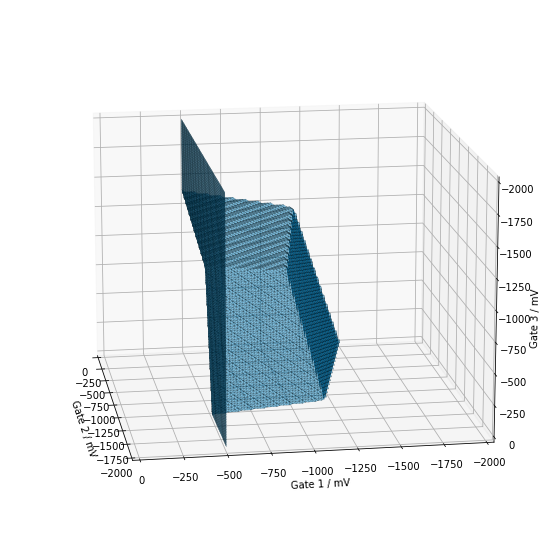

reconstraining parameters basic.lengthscale
reconstraining parameters basic.lengthscale
reconstraining parameters basic.lengthscale
reconstraining parameters sum.basic.lengthscale
reconstraining parameters sum.basic.lengthscale
reconstraining parameters sum.basic.lengthscale
reconstraining parameters sum.basic.variance
reconstraining parameters sum.basic.lengthscale
reconstraining parameters sum.basic.lengthscale
reconstraining parameters sum.basic.lengthscale
reconstraining parameters sum.basic.variance


============### ITERATION 0 ###============
GPR: False GPC: False prune: True GPR1: False GPC1: False Optim: False
True
0.6366003504593688
dvec pinches:  [ True  True  True]
conditional_idx: 2
vols_pinchoff: [-1375.43040344  -408.43423454  -122.36290833]
detected: True
r_vals: 1440.0000000000002
============### ITERATION 1 ###============
GPR: False GPC: False prune: True GPR1: False GPC1: False Optim: False
False
dvec pinches:  [ True  True  True]
conditional_idx: 1
vols_pinchoff: [ -897.65083147  -277.55093197 -1220.15919655]
detected: True
r_vals: 1540.0
============### ITERATION 2 ###============
GPR: False GPC: False prune: True GPR1: False GPC1: False Optim: False
True
0.4584644923008381
Score thresh:  0.001
dvec pinches:  [ True  True  True]
conditional_idx: 3
vols_pinchoff: [-1259.82301562  -701.89518047  -332.54943232]
detected: True
r_vals: 1480.0000000000002
============### ITERATION 3 ###============
GPR: False GPC: False prune: True GPR1: False GPC1: False Optim: False
Fal

 /Users/jwe/.virtualenvs/AutoDot/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 4/5, f = 77.31230853719076
Optimization restart 5/5, f = 77.31230853573054
  basic.       |              value  |  constraints  |    priors  
  variance     |  749999.9999999999  |   +ve fixed   |            
  lengthscale  |               (3,)  |      +ve      |  Ga(16, 40)
  index  |  GP_regression.basic.lengthscale  |  constraints  |    priors  
  [0]    |                       0.47025635  |      +ve      |  Ga(16, 40)
  [1]    |                       0.46470473  |      +ve      |  Ga(16, 40)
  [2]    |                       0.46987965  |      +ve      |  Ga(16, 40)
  index  |  GP_regression.basic.variance  |  constraints  |  priors
  [0]    |               750000.00000000  |   +ve fixed   |        
There are 12 training examples for model 0 and 11 are positive
There are 11 training examples for model 1 and 4 are positive
  sum.               |                  value  |  constraints  |     priors    
  basic.variance     |      42.17412559616267  |      +ve     

 /Users/jwe/PycharmProjects/AutoDot/main_utils/utils.py:44: RuntimeWarning:invalid value encountered in true_divide


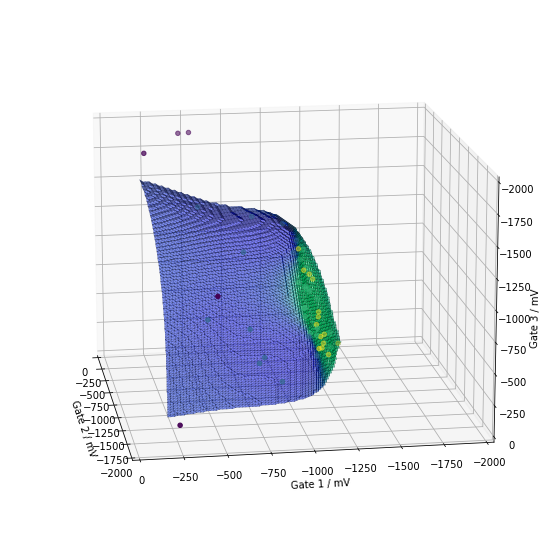

 /Users/jwe/.virtualenvs/AutoDot/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning:Mean of empty slice.
 /Users/jwe/.virtualenvs/AutoDot/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:invalid value encountered in double_scalars


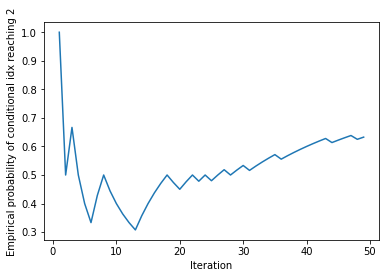

({'conditional_idx': [2,
   1,
   3,
   1,
   1,
   0,
   3,
   3,
   1,
   1,
   1,
   1,
   0,
   3,
   3,
   3,
   3,
   3,
   0,
   1,
   3,
   3,
   0,
   2,
   0,
   3,
   2,
   1,
   2,
   2,
   1,
   2,
   2,
   2,
   3,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   1,
   2,
   2,
   3,
   1,
   2,
   3],
  'vols_pinchoff': [array([-1375.43040344,  -408.43423454,  -122.36290833]),
   array([ -897.65083147,  -277.55093197, -1220.15919655]),
   array([-1259.82301562,  -701.89518047,  -332.54943232]),
   array([ -500.4207737 , -1200.44612363,  -706.33430719]),
   array([ -804.94230106, -1219.55247209,  -338.7619515 ]),
   array([ -159.97643832,  -966.86914335, -1991.9768068 ]),
   array([-1199.32522482,  -427.6724118 ,  -799.51218552]),
   array([-1475.22136414,   -95.75602535,   -28.14434543]),
   array([ -563.46892512,  -266.69418031, -1313.49880198]),
   array([ -770.15739554,  -808.31032043, -1105.94803846]),
   array([-1083.57337544,  -317.13190353, -1164.0409912 ]),
   

In [4]:
tune_with_playground_from_file(config_file)